In [ ]:
!pip install langchain-core==0.3.13
!pip install langchain==0.2.16
!pip install langchain-huggingface==0.1.1
!pip install langgraph==0.2.68
!pip uninstall -y numpy transformers
!pip install --upgrade pip
!pip install numpy transformers
!pip install -qU langchain-groq

  Using cached langchain_core-0.2.43-py3-none-any.whl.metadata (6.2 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached langchain_core-0.2.43-py3-none-any.whl (397 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [langchain-core]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-huggingface 0.1.1 requires langchain-core<0.4.0,>=0.3.13, but you have langchain-co

  Using cached langchain_core-0.3.68-py3-none-any.whl.metadata (5.8 kB)
  Using cached langsmith-0.4.5-py3-none-any.whl.metadata (15 kB)
Using cached langchain_core-0.3.68-py3-none-any.whl (441 kB)
Using cached langsmith-0.4.5-py3-none-any.whl (367 kB)
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.147
    Uninstalling langsmith-0.1.147:
      Successfully uninstalled langsmith-0.1.147
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.2.43
    Uninstalling langchain-core-0.2.43:
      Successfully uninstalled langchain-core-0.2.43
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [langchain-core]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-text-splitters 0.2.4 requires langchain-core<0.3.0,>=0.2.38, but you have langchain-core 0.3.68 which is incompatible.
langchain 0.2.16 requ

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    api_key='your api key'
)

# Invoke LLM without Tools

In [ ]:
from langchain_core.messages import (
    HumanMessage,
    SystemMessage,
)

messages = [
    SystemMessage(content="You're a helpful assistant"),
    HumanMessage(
        content="What is the bitcoin price now"
    ),
]

ai_msg = llm.invoke(messages)
print("ai_msg")
print(ai_msg)

ai_msg
content='I\'m not currently able to share real-time information. However, I can suggest some reliable sources where you can find the current Bitcoin price:\n\n1. **CoinMarketCap**: A popular website that provides real-time cryptocurrency prices, including Bitcoin.\n2. **CoinGecko**: Another reliable source for cryptocurrency prices, including Bitcoin.\n3. **Google Search**: You can simply type "Bitcoin price" in Google, and it will show you the current price based on various sources.\n4. **Cryptocurrency exchanges**: You can also check the prices on popular cryptocurrency exchanges like Binance, Kraken, or Coinbase.\n\nPlease note that cryptocurrency prices can fluctuate rapidly, so the price may change quickly.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 140, 'prompt_tokens': 46, 'total_tokens': 186, 'completion_time': 0.186666667, 'prompt_time': 0.002262551, 'queue_time': 0.087700549, 'total_time': 0.188929218}, 'model_name': 'llama-3.1-8b-ins

# Invoke LLM Tool Calling

Define Tools

In [ ]:
import requests
def getBitcoinPrice(crypto_code:str) -> dict:
  """ Fetches the latest crypto price. Use the crypto currency name.
  Eg:
  bitcoin for Bitcoin
  ethereum for Ethereum
  """
  url = f"https://api.coingecko.com/api/v3/simple/price?ids={crypto_code}&vs_currencies=usd"
  response = requests.get(url)
  return response.json()


def getWorldNews(country_code:str)->list:
  """
  Fetches the latest news in a coutry from the specified country code
  Eg:
  in for india
  us for America
  pk for pakistan
  jp for jappan
  """
  news_headlines = []
  api_key = "your api key"
  url = f"https://gnews.io/api/v4/top-headlines?country={country_code}&token={api_key}"
  response = requests.get(url)
  for eachObject in response.json()['articles']:
    news_headlines.append(eachObject['title'])
  return news_headlines

tools = [getBitcoinPrice,getWorldNews]
llm_with_tools = llm.bind_tools(tools)

create_react_agent

In [ ]:
from langgraph.prebuilt import create_react_agent
graph = create_react_agent(llm_with_tools, tools=tools)

Show Agent

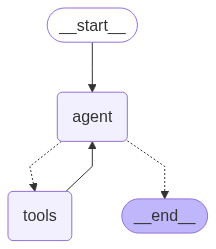

In [ ]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

Show React Prompt

In [ ]:
from langchain import hub
prompt = hub.pull("hwchase17/react")
prompt.pretty_print()

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
from langchain_core.messages import ToolMessage
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()
        # if type(message)==ToolMessage:
        #   break

Invoking Agent

In [ ]:
inputs = {
    "messages": [
        {"role": "user", "content": "You are good at cryptocurrency and world news"},
        {"role": "assistant", "content": "Ask me any cryptocurrency or real world news related question, I will answer it using provided tools"},
        {"role": "user", "content": "Generate a funny poem about the ethereum price now"}
        #{"role": "user", "content": "Generate a document about current situations in india"}
    ]
}
# Run the agent
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Generate a funny poem about the ethereum price now
================================== Ai Message ==================================
Tool Calls:
  getBitcoinPrice (nxepbjfqk)
 Call ID: nxepbjfqk
  Args:
    crypto_code: ethereum
  getBitcoinPrice (mph65htxf)
 Call ID: mph65htxf
  Args:
    crypto_code: ethereum
================================= Tool Message =================================
Name: getBitcoinPrice

{"ethereum": {"usd": 2970.06}}
================================== Ai Message ==================================

Here's a funny poem about the Ethereum price:

Oh Ethereum, oh Ethereum, so volatile and bright,
Your price is up, your price is down, it's a wild delight.
One day you're worth 3000, the next you're worth less,
It's like a rollercoaster ride, we're all in a mess!

Your gas fees are high, your transactions are slow,
But still we hold on tight, with a "HODL" to go.
We dream of the days, w